In [17]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
%matplotlib inline

In [18]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

Have a look on the first 5 entries of the dataset

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.columns

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Based on the info above, there is no missing value. However, TotalCharges is in string format. It has to be changed to numerical value.

In [19]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

Convert the data type of TotalCharges to numeric values. Coerce -> values that are unable to convert to numeric will be replaced with NaN.

In [ ]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

Based on the finding above, there are 11 null values for TotalCharges after the conversion. Hence, the null values are to be replaced. For this case, the null values are replace with the mean value of TotalCharges

In [20]:
df['TotalCharges'].fillna(value=df['TotalCharges'].mean(), inplace=True)

Next, the customerID feature can be removed as it does not contribute to model training later. 

In [21]:
df_clean = df.drop('customerID', axis = 1)

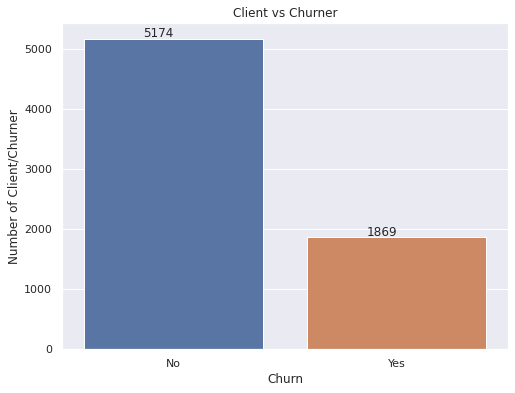

In [23]:
sns.set(rc={'figure.figsize':(8,6)})

ax = sns.countplot(x='Churn',data=df_clean)
plt.ylabel('Number of Client/Churner')
plt.title('Client vs Churner')

total = len(df_clean)
for p in ax.patches:       
        value = '{0}'.format(p.get_height())
        x = p.get_x() + p.get_width() /3
        y = p.get_y() + p.get_height()+25
        ax.annotate(value, (x, y))
plt.savefig('client_vs_churner.png')
plt.show()

Based on the graph, the dataset is with 5174 Client and 1869 Churner.

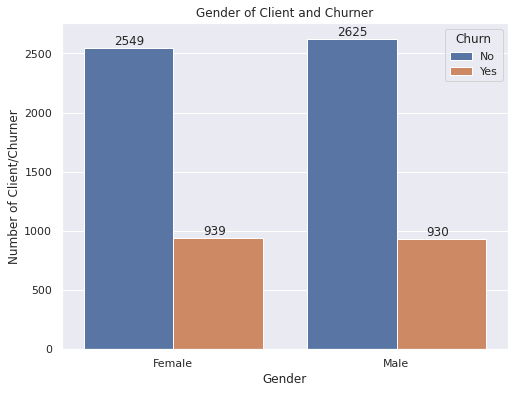

In [ ]:
ax=sns.countplot(x='gender',data=df_clean, hue='Churn')
plt.ylabel('Number of Client/Churner')
plt.xlabel('Gender')
plt.title('Gender of Client and Churner')

total = len(df_clean)
for p in ax.patches:       
        value = '{0}'.format(p.get_height())
        x = p.get_x() + p.get_width() /3
        y = p.get_y() + p.get_height()+25
        ax.annotate(value, (x, y))
plt.show()

Based on the graph, it can be seen that the distribution of Client and Churner for both male and female are about the same.

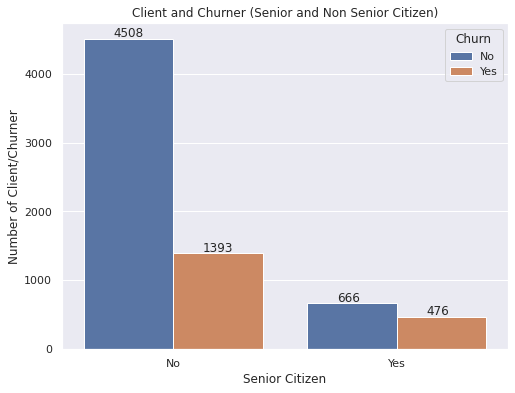

In [10]:
ax=sns.countplot(x='SeniorCitizen',data=df_clean, hue='Churn')
plt.ylabel('Number of Client/Churner')
plt.xlabel('Senior Citizen')
plt.xticks([0,1],['No','Yes'])
plt.title('Client and Churner (Senior and Non Senior Citizen)')

total = len(df_clean)
for p in ax.patches:       
        value = '{0}'.format(p.get_height())
        x = p.get_x() + p.get_width() /3
        y = p.get_y() + p.get_height()+25
        ax.annotate(value, (x, y))
plt.show()

Based on the findings, it can be seen the population is with 5901 non senior citizen and 1142 senior citizen.

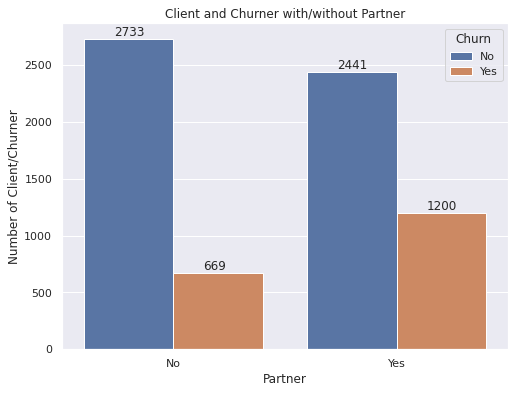

In [9]:
ax=sns.countplot(x='Partner',data=df_clean, hue='Churn')
plt.ylabel('Number of Client/Churner')
plt.xlabel('Partner')
plt.xticks([0,1],['No','Yes'])
plt.title('Client and Churner with/without Partner')

total = len(df_clean)
for p in ax.patches:       
        value = '{0}'.format(p.get_height())
        x = p.get_x() + p.get_width() /3
        y = p.get_y() + p.get_height()+25
        ax.annotate(value, (x, y))
plt.show()

Based on the graph, it can be seen that 3402 clients are without partner (669 of them are churner) and 3641 client are with partner (1200 of them are churner). <br> This show that client with partner is with the higher tendency to churn.

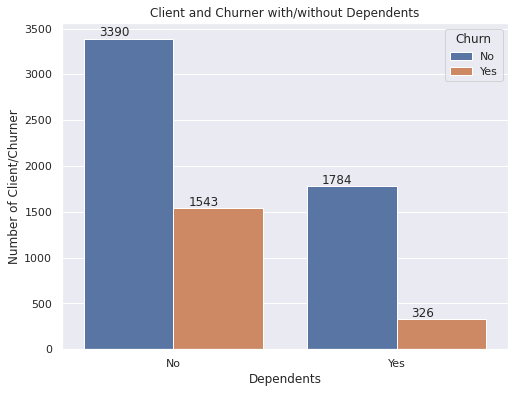

In [24]:
ax=sns.countplot(x='Dependents',data=df_clean, hue='Churn')
plt.ylabel('Number of Client/Churner')
plt.xlabel('Dependents')
plt.xticks([0,1],['No','Yes'])
plt.title('Client and Churner with/without Dependents')

total = len(df_clean)
for p in ax.patches:       
        value = '{0}'.format(p.get_height())
        x = p.get_x() + p.get_width() /6
        y = p.get_y() + p.get_height()+25
        ax.annotate(value, (x, y))
plt.savefig('dependent_client_vs_churner.png')
plt.show()

Based on the graph, it can be seen that 4933 clients are without dependents and 1543 of them had churned. 2110 clients are with dependents and 326 of them had churned. <br> This shows that client without dependent is more likely to churn.

In [12]:
df_clean['tenure'].describe()

count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64

In [9]:
def tenureInYear(tenure):
  year = 0
  if tenure < 12:
    year = 0
  elif tenure >= 12 and tenure < 24:
    year = 1
  elif tenure >= 24 and tenure < 36:
    year = 2
  elif tenure >= 36 and tenure < 48:
    year = 3
  elif tenure >= 48 and tenure < 60:
    year = 4
  elif tenure >= 60 and tenure < 72:
    year = 5
  else:
    year = 6

  return year

df_clean['yearTenure'] = df_clean['tenure'].apply(tenureInYear)

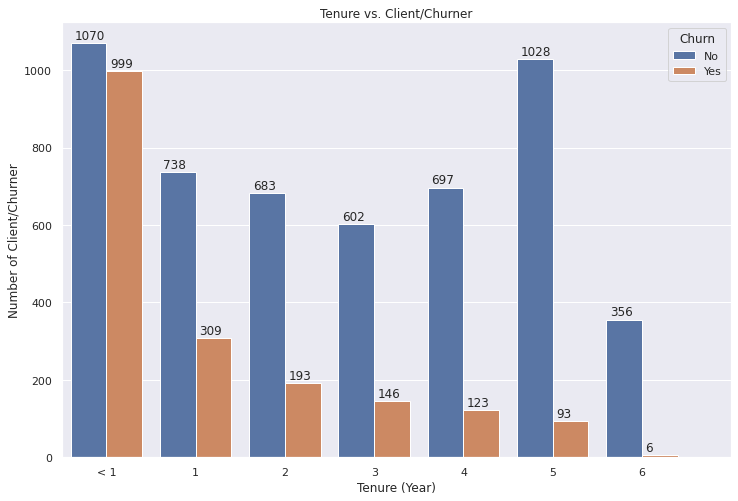

In [16]:
plt.figure(figsize=(12,8))
ax = sns.countplot(x='yearTenure',data=df_clean, hue='Churn')
plt.ylabel('Number of Client/Churner')
plt.xlabel('Tenure (Year)')
plt.title('Tenure vs. Client/Churner')
plt.xticks([0,1,2,3,4,5,6,7],['< 1', '1', '2','3','4','5','6'])

total = len(df_clean)
for p in ax.patches:       
        value = '{0}'.format(p.get_height())
        x = p.get_x() + p.get_width() /10
        y = p.get_y() + p.get_height()+10
        ax.annotate(value, (x, y))
plt.savefig('client_vs_churner.png')
plt.show()


Based on the graph, the tenure less than 1 year is with the highest number of client (2069, 1070 are client and 999 are churner) and decreases across the years. In short, the longer the tenure, the lower the churn rate.

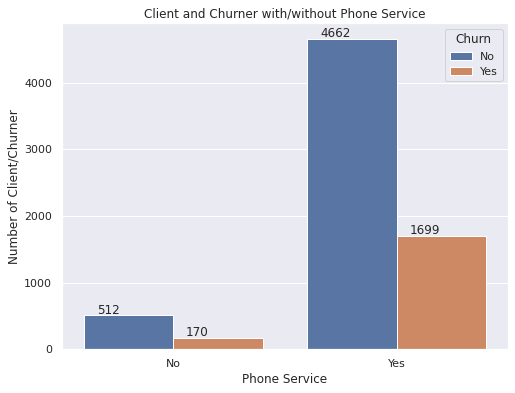

In [16]:
ax1 = sns.countplot(x='PhoneService',data=df_clean, hue='Churn')
#plt.xticks([0,1,2,3,4,5,6,7],['< 1', '1', '2','3','4','5','6'])
plt.ylabel('Number of Client/Churner')
plt.title('Client and Churner with/without Phone Service')
plt.xlabel('Phone Service')

total = len(df_clean)
for p in ax1.patches:       
        value = '{0}'.format(p.get_height())
        x = p.get_x() + p.get_width() /7
        y = p.get_y() + p.get_height()+25
        ax1.annotate(value, (x, y))

plt.show()

Based on the graph, 6361 of the population subscribed the Phone Service. 4662 of the clients are still with the telco and 1699 of the clients have churned. Only 682 client without subscribing to Phone Service (512 are still clients and 170 are churner)

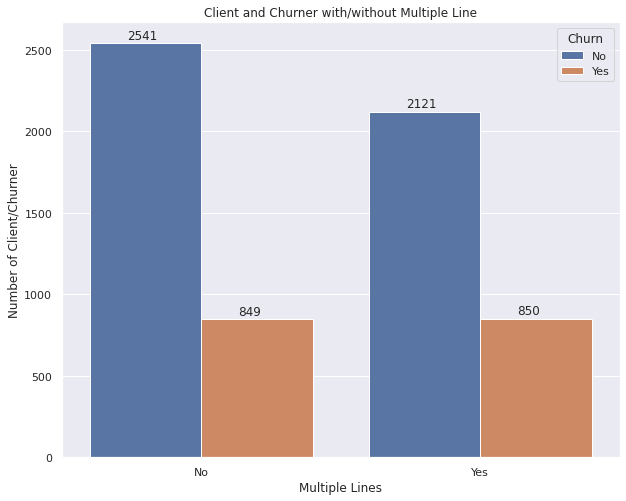

In [17]:
df_ax = df_clean[df_clean['MultipleLines'] != 'No phone service']
plt.figure(figsize=(10,8))
ax = sns.countplot(x='MultipleLines',data=df_ax, hue='Churn')
plt.ylabel('Number of Client/Churner')
plt.xlabel('Multiple Lines')
plt.title('Client and Churner with/without Multiple Line')
#plt.xticks([0,1,2,3,4,5,6,7],['< 1', '1', '2','3','4','5','6'])

total = len(df_ax)
for p in ax.patches:       
        value = '{0}'.format(p.get_height())
        x = p.get_x() + p.get_width() /3
        y = p.get_y() + p.get_height()+25
        ax.annotate(value, (x, y))
plt.show()

Based on the graph, among the 6361 client with Phone Service, 2971 of them are with Multiple Lines service and 850 of them have churned. <br> 3390 of the clients are without Multiple Line service and 849 of them have churned. 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:49: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.


<function matplotlib.pyplot.show>

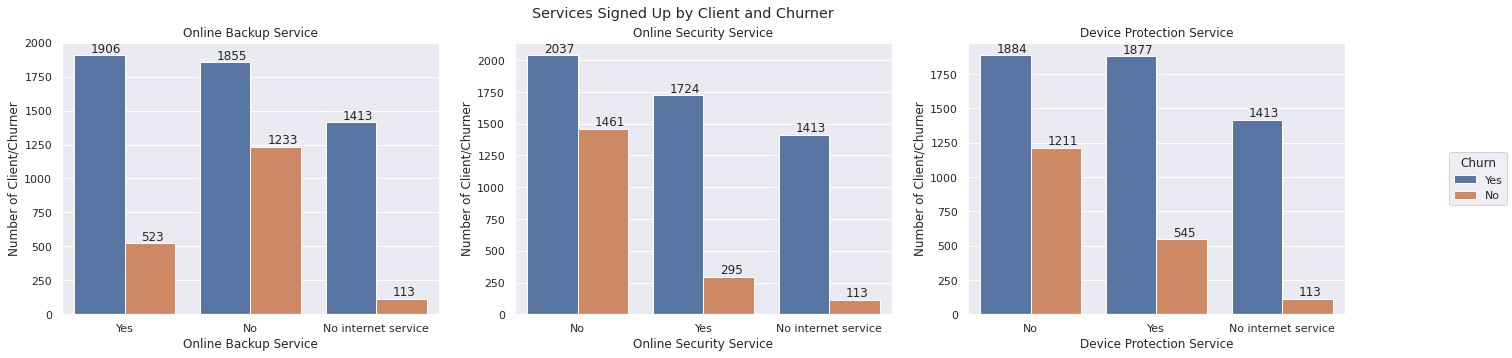

In [25]:
fig, axes = plt.subplots(1,3, figsize=(23,5), sharey=False)
fig.suptitle('Services Signed Up by Client and Churner')

ax1 = sns.countplot(x='OnlineBackup',data=df_clean, ax=axes[0], hue='Churn')
axes[0].set_ylabel('Number of Client/Churner')
axes[0].set_title('Online Backup Service')
axes[0].set_xlabel('Online Backup Service')
plt.sca(axes[0])
ax1.get_legend().set_visible(False)
#plt.xticks([0,1],['No','Yes'])

total = len(df_clean)
for p in ax1.patches:       
        value = '{0}'.format(p.get_height(),)
        x = p.get_x() + p.get_width() /3
        y = p.get_y() + p.get_height()+25
        ax1.annotate(value, (x, y))

ax2 = sns.countplot(x='OnlineSecurity',data=df_clean, ax=axes[1], hue='Churn')
axes[1].set_ylabel('Number of Client/Churner')
axes[1].set_title('Online Security Service')
axes[1].set_xlabel('Online Security Service')
ax2.get_legend().set_visible(False)
plt.sca(axes[1])
#plt.xticks([0,1],['No','Yes'])

total = len(df_clean)
for p in ax2.patches:       
        value = '{0}'.format(p.get_height(),)
        x = p.get_x() + p.get_width() /3
        y = p.get_y() + p.get_height()+25
        ax2.annotate(value, (x, y))

ax3 = sns.countplot(x='DeviceProtection',data=df_clean, ax=axes[2], hue='Churn')
axes[2].set_ylabel('Number of Client/Churner')
axes[2].set_title('Device Protection Service')
axes[2].set_xlabel('Device Protection Service')
ax3.get_legend().set_visible(False)
plt.sca(axes[2])
#plt.xticks([0,1],['No','Yes'])

total = len(df_clean)
for p in ax3.patches:       
        value = '{0}'.format(p.get_height(),)
        x = p.get_x() + p.get_width() /3
        y = p.get_y() + p.get_height()+25
        ax3.annotate(value, (x, y))

fig.legend([ax1,ax2], labels=['Yes','No'], loc='center right', title='Churn')
# Adjust the scaling factor to fit your legend text completely outside the plot
# (smaller value results in more space being made for the legend)
#plt.subplots_adjust(right=0.85)
plt.savefig('services_client_vs_churner.png')
plt.show

Based on the graphs, <br>
Those who did not subscribe for Online Backup, Online Security and Device Protection services are with higher number of churner. <br> This shows that client is with posibilities to churn if no subscription to Online Backup, Online Secuirty and Device Protection services. 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:49: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.


<function matplotlib.pyplot.show>

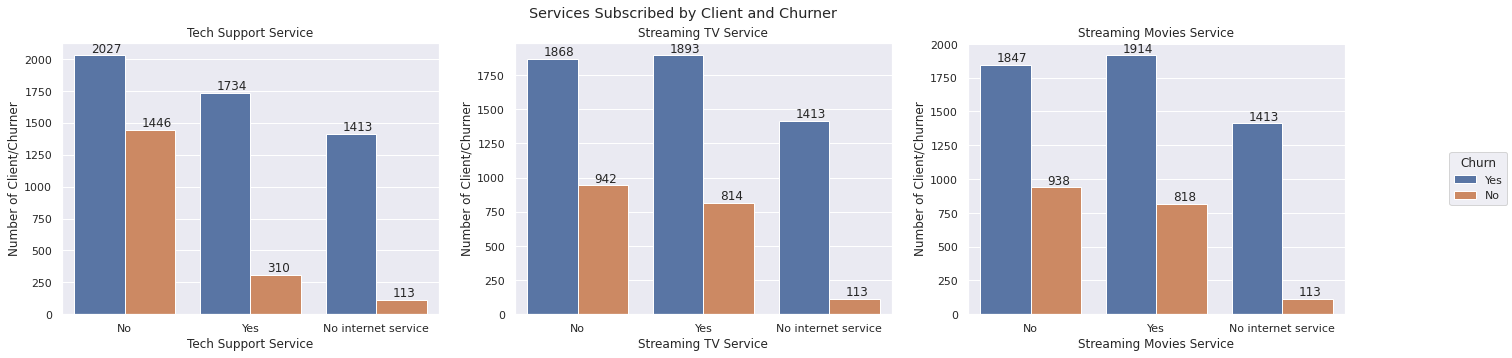

In [19]:
fig, axes = plt.subplots(1,3, figsize=(23,5), sharey=False)
fig.suptitle('Services Subscribed by Client and Churner')

ax1 = sns.countplot(x='TechSupport',data=df_clean, ax=axes[0], hue='Churn')
axes[0].set_ylabel('Number of Client/Churner')
axes[0].set_title('Tech Support Service')
axes[0].set_xlabel('Tech Support Service')
plt.sca(axes[0])
ax1.get_legend().set_visible(False)
#plt.xticks([0,1],['No','Yes'])

total = len(df_clean)
for p in ax1.patches:       
        value = '{0}'.format(p.get_height(),)
        x = p.get_x() + p.get_width() /3
        y = p.get_y() + p.get_height()+25
        ax1.annotate(value, (x, y))

ax2 = sns.countplot(x='StreamingTV',data=df_clean, ax=axes[1], hue='Churn')
axes[1].set_ylabel('Number of Client/Churner')
axes[1].set_title('Streaming TV Service')
axes[1].set_xlabel('Streaming TV Service')
ax2.get_legend().set_visible(False)
plt.sca(axes[1])
#plt.xticks([0,1],['No','Yes'])

total = len(df_clean)
for p in ax2.patches:       
        value = '{0}'.format(p.get_height(),)
        x = p.get_x() + p.get_width() /3
        y = p.get_y() + p.get_height()+25
        ax2.annotate(value, (x, y))

ax3 = sns.countplot(x='StreamingMovies',data=df_clean, ax=axes[2], hue='Churn')
axes[2].set_ylabel('Number of Client/Churner')
axes[2].set_title('Streaming Movies Service')
axes[2].set_xlabel('Streaming Movies Service')
ax3.get_legend().set_visible(False)
plt.sca(axes[2])
#plt.xticks([0,1],['No','Yes'])

total = len(df_clean)
for p in ax3.patches:       
        value = '{0}'.format(p.get_height(),)
        x = p.get_x() + p.get_width() /3
        y = p.get_y() + p.get_height()+25
        ax3.annotate(value, (x, y))

fig.legend([ax1,ax2], labels=['Yes','No'], loc='center right',title='Churn')
# Adjust the scaling factor to fit your legend text completely outside the plot
# (smaller value results in more space being made for the legend)
#plt.subplots_adjust(right=0.85)
plt.show

Based on the graphs above, <br>
The number of churner is high for client that did not subscribe to Tech Support service as compared to client that subscribed to this service. <br> 
However, the number of churner with/without Streaming TV and Streaming Movies services are about the same.

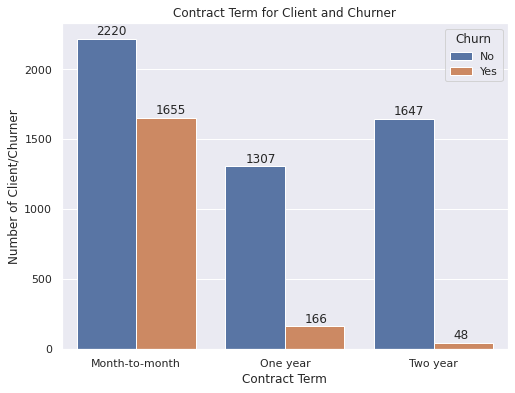

In [20]:
ax = sns.countplot(x='Contract',data=df_clean, hue='Churn')
plt.ylabel('Number of Client/Churner')
plt.xlabel('Contract Term')
plt.title('Contract Term for Client and Churner')
#plt.xticks([0,1,2,3,4,5,6,7],['< 1', '1', '2','3','4','5','6'])

total = len(df_clean)
for p in ax.patches:       
        value = '{0}'.format(p.get_height())
        x = p.get_x() + p.get_width() /3
        y = p.get_y() + p.get_height()+25
        ax.annotate(value, (x, y))
plt.show()

Based on the graph, there are 2220, 1307 and 1647 clients with Month-to-Month, One Year and Two Year contract terms, respectively. <br> As for Churner, there are 1655 for Month-to-Month contract, follow by 166 and 48 for One Year and Two Year contracts, respectively. <br> This can be seen that churner is less likely to subscribe one or two years contract with the telco.


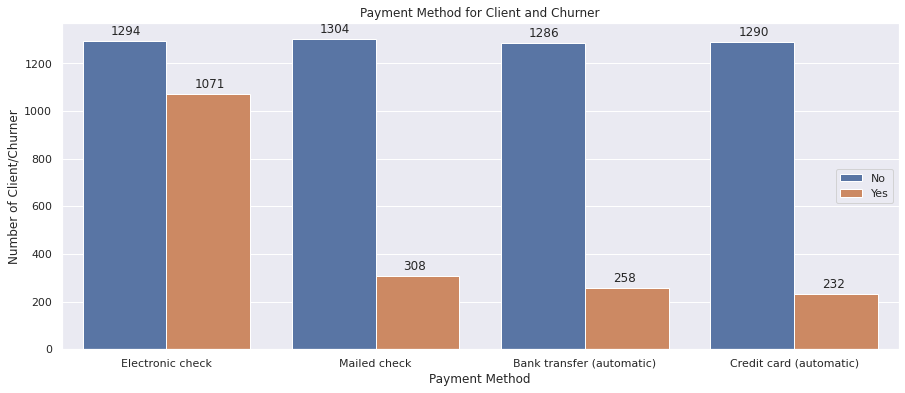

In [26]:
plt.subplots(figsize=(15,6))
ax = sns.countplot(x='PaymentMethod',data=df_clean, hue='Churn')
plt.ylabel('Number of Client/Churner')
plt.xlabel('Payment Method')
plt.title('Payment Method for Client and Churner')
plt.legend(loc='center right')
#plt.xticks([0,1,2,3,4,5,6,7],['< 1', '1', '2','3','4','5','6'])

total = len(df_clean)
for p in ax.patches:       
        value = '{0}'.format(p.get_height())
        x = p.get_x() + p.get_width() /3
        y = p.get_y() + p.get_height()+25
        ax.annotate(value, (x, y))
plt.savefig('payment_client_vs_churner.png')
plt.show()

Based on the graph above, payment method of Electroic Check is with the highest number of churner (1071) as compared with the rest (Mailed Check -308, Bank Transfer - 258 and Credit Card - 232). <br> The number of active clients are about the same accross the 4 payment methods.

Text(0.5, 1.0, 'Comparison of Monthy Charges for Client and Churner')

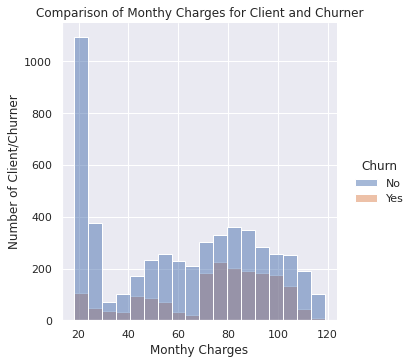

In [23]:
sns.displot(x='MonthlyCharges', data=df_clean, hue='Churn')
plt.ylabel('Number of Client/Churner')
plt.xlabel('Monthy Charges')
plt.title('Comparison of Monthy Charges for Client and Churner')

Based on the graph above, monthly charges of 70 - 110 are with the most churner. 

Text(0.5, 1.0, 'Comparison of Total Charges (per year) for Client and Churner')

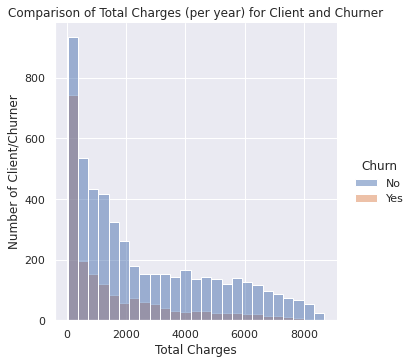

In [24]:
sns.displot(x='TotalCharges', data=df_clean, hue='Churn')
plt.ylabel('Number of Client/Churner')
plt.xlabel('Total Charges')
plt.title('Comparison of Total Charges (per year) for Client and Churner')

Based on the graph above, total charges of 200 - 400 are with the most churner and client. The number of churner and client are reduced accross with the increased of total charges.

In [22]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


Encoding needed to transform non numeric values into numeric before training the classif

In [27]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_clean['gender'] = le.fit_transform(df_clean['gender'])
df_clean['Partner'] = le.fit_transform(df_clean['Partner'])
df_clean['Dependents'] = le.fit_transform(df_clean['Dependents'])
df_clean['PhoneService'] = le.fit_transform(df_clean['PhoneService'])
df_clean['MultipleLines'] = le.fit_transform(df_clean['MultipleLines'])
df_clean['InternetService'] = le.fit_transform(df_clean['InternetService'])
df_clean['OnlineSecurity'] = le.fit_transform(df_clean['OnlineSecurity'])
df_clean['OnlineBackup'] = le.fit_transform(df_clean['OnlineBackup'])
df_clean['DeviceProtection'] = le.fit_transform(df_clean['DeviceProtection'])
df_clean['TechSupport'] = le.fit_transform(df_clean['TechSupport'])
df_clean['StreamingTV'] = le.fit_transform(df_clean['StreamingTV'])
df_clean['StreamingMovies'] = le.fit_transform(df_clean['StreamingMovies'])
df_clean['Contract'] = le.fit_transform(df_clean['Contract'])
df_clean['PaperlessBilling'] = le.fit_transform(df_clean['PaperlessBilling'])
df_clean['PaymentMethod'] = le.fit_transform(df_clean['PaymentMethod'])
df_clean['Churn'] = le.fit_transform(df_clean['Churn']) 


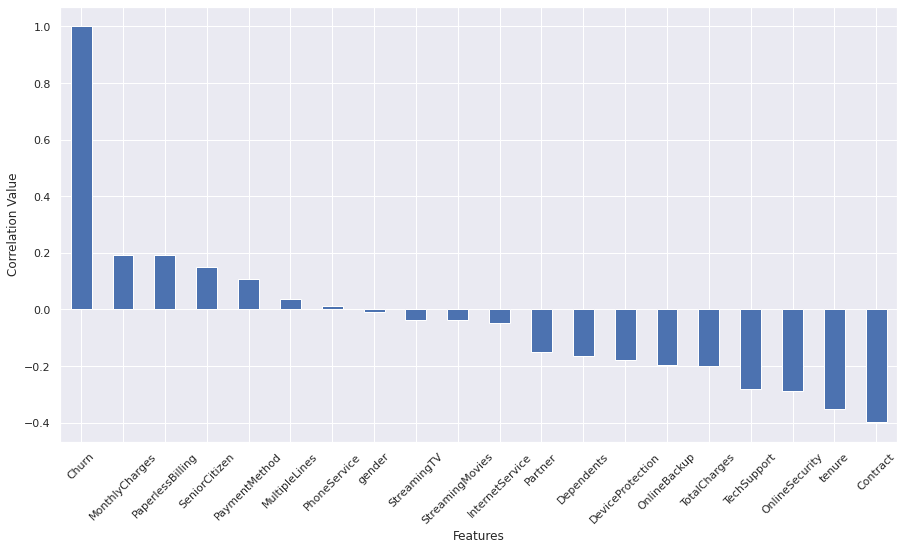

In [28]:
plt.figure(figsize=(15,8))
df_clean.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')
plt.ylabel('Correlation Value')
plt.xlabel('Features')
plt.xticks(rotation=45)
plt.savefig('feature_correlation.png')

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import MinMaxScaler
model_name = ['LogisticRegression', 'RandomForestClassifier', 'SVC', 'KNeighborsClassifier']
ac_score = []

Tenure, MonthlyCharges and TotalCharges are measured at different scales and do not contribute equally to the model fitting and model learned function and might end up creating a bias. <br> Thus, to deal with this potential problem feature-wise normalization MinMax Scaling is used prior to model fitting

In [30]:
scaler = MinMaxScaler()
df_clean[['tenure','MonthlyCharges','TotalCharges']] = scaler.fit_transform(df_clean[['tenure','MonthlyCharges','TotalCharges']])

In [31]:
Y = df_clean['Churn']
x = df_clean.drop('Churn', axis=1)
X_test, X_train, y_test, y_train = train_test_split(x, Y, test_size= 0.2, random_state = 0)

In [32]:
le_model = LogisticRegression()
le_model.fit(X_train, y_train)
y_predict = le_model.predict(X_test)
print ('Accuracy Score for Logistic Regression is {0:.2f}%\n'.format(accuracy_score(y_test, y_predict)*100))
print ('Classification Report for Logistic Regression\n'+classification_report(y_test,y_predict))
print ('Confusion Matrix for Logistic Regression\n')
print (confusion_matrix(y_test,y_predict))
ac_score.append(accuracy_score(y_test, y_predict)*100)

Accuracy Score for Logistic Regression is 79.62%

Classification Report for Logistic Regression
              precision    recall  f1-score   support

           0       0.83      0.90      0.87      4133
           1       0.65      0.50      0.57      1501

    accuracy                           0.80      5634
   macro avg       0.74      0.70      0.72      5634
weighted avg       0.78      0.80      0.79      5634

Confusion Matrix for Logistic Regression

[[3737  396]
 [ 752  749]]


In [33]:
rf = RandomForestClassifier(n_estimators=30)
rf_model = rf.fit(X_train, y_train)
y_predict = rf_model.predict(X_test)
print ('Accuracy Score for Random Forest Classifier is {0:.2f}%\n'.format(accuracy_score(y_test, y_predict)*100))
print ('Classification Report for Random Forest Classifier\n'+classification_report(y_test,y_predict))
print ('Confusion Matrix for Random Forest Classifier\n')
print (confusion_matrix(y_test,y_predict))
ac_score.append(accuracy_score(y_test, y_predict)*100)

Accuracy Score for Random Forest Classifier is 77.85%

Classification Report for Random Forest Classifier
              precision    recall  f1-score   support

           0       0.82      0.90      0.86      4133
           1       0.62      0.45      0.52      1501

    accuracy                           0.78      5634
   macro avg       0.72      0.67      0.69      5634
weighted avg       0.76      0.78      0.77      5634

Confusion Matrix for Random Forest Classifier

[[3714  419]
 [ 829  672]]


In [34]:
svc = SVC()
svc_model = rf.fit(X_train, y_train)
y_predict = svc_model.predict(X_test)
print ('Accuracy Score for SVC is {0:.2f}%\n'.format(accuracy_score(y_test, y_predict)*100))
print ('Classification Report for SVC\n'+classification_report(y_test,y_predict))
print ('Confusion Matrix for SVC\n')
print (confusion_matrix(y_test,y_predict))
ac_score.append(accuracy_score(y_test, y_predict)*100)

Accuracy Score for SVC is 78.58%

Classification Report for SVC
              precision    recall  f1-score   support

           0       0.82      0.91      0.86      4133
           1       0.64      0.45      0.53      1501

    accuracy                           0.79      5634
   macro avg       0.73      0.68      0.69      5634
weighted avg       0.77      0.79      0.77      5634

Confusion Matrix for SVC

[[3758  375]
 [ 832  669]]


In [35]:
print ('Accuracy score for KNeighborClassifier')
knLs = []
for i in range (1,10):
    model = KNeighborsClassifier(n_neighbors = i)
    model.fit(X_train, y_train)
    y_predict = model.predict(X_test)
    print ('For {0} neighbors is {1:.2f}%'.format(i, accuracy_score(y_test, y_predict)*100))
    knLs.append(accuracy_score(y_test, y_predict)*100)
ac_score.append(max(knLs))

Accuracy score for KNeighborClassifier
For 1 neighbors is 69.35%
For 2 neighbors is 74.39%
For 3 neighbors is 73.50%
For 4 neighbors is 75.42%
For 5 neighbors is 74.81%
For 6 neighbors is 76.20%
For 7 neighbors is 75.81%
For 8 neighbors is 76.78%
For 9 neighbors is 76.11%


In [36]:
models_result = []
for i in range(4):
  lst = [model_name[i], ac_score[i]]
  models_result.append(lst)
df_result = pd.DataFrame(models_result, columns=['Model', 'Accuracy Score'])
df_result

,Model,Accuracy Score
0,LogisticRegression,79.623713
1,RandomForestClassifier,77.848775
2,SVC,78.576500
3,KNeighborsClassifier,76.783813


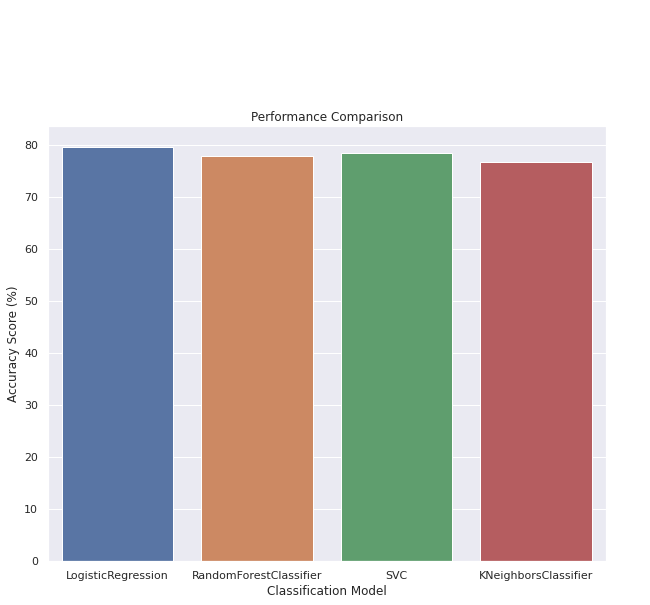

In [38]:
plt.figure(figsize=(10,8))
ax = sns.barplot(x='Model', y='Accuracy Score',data=df_result)
plt.ylabel('Accuracy Score (%)')
plt.xlabel('Classification Model')
plt.title('Performance Comparison')
for p in ax.patches:       
        value = '{0}'.format(p.get_height())
        x = p.get_x() + p.get_width() /3
        y = p.get_y() + p.get_height()+25
        ax.annotate(value, (x, y))
plt.savefig('model_performance.png')
plt.show()

Based on the results, it can be seen that Logistic Regression gives the best result. This is followed by Random Forest Classifier, SVC and KNeighbor Classifier.